In [1]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

client = DataFrameClient(host='localhost', port=8086, username='admin', password='admin' , database='VirtualBuilding_ottimizzato')

Tin_Bathroom_query = client.query('SELECT value FROM "Tin_Bathroom"')
Tin_Kitchen_query = client.query('SELECT value FROM "Tin_Kitchen"')
Tin_Bedroom_query = client.query('SELECT value FROM "Tin_Bedroom"')
Tin_Livingroom_query = client.query('SELECT value FROM "Tin_LivingRoom"')
Tin_Stairs_query = client.query('SELECT value FROM "Tin_Stairs"')
Tin_Storage_query = client.query('SELECT value FROM "Tin_Storage"')
T_ext_query = client.query('SELECT "value" FROM "T_ext"')

In [2]:
T_in_df = Tin_Bathroom_query['Tin_Bathroom']
T_in_df['Tin_Bath'] = T_in_df['value']
T_in_df = T_in_df.drop('value', axis=1)
T_in_df['Tin_K'] = Tin_Kitchen_query['Tin_Kitchen']
T_in_df['Tin_Bed'] = Tin_Bedroom_query['Tin_Bedroom']
T_in_df['Tin_Liv'] = Tin_Livingroom_query['Tin_LivingRoom']
T_in_df['Tin_Stairs'] = Tin_Stairs_query['Tin_Stairs']
T_in_df['Tin_Storage'] = Tin_Storage_query['Tin_Storage']
T_in_df = T_in_df.dropna()
T_in_df['mean_house'] = T_in_df.mean(axis=1)
#T_in_df = T_in_df['mean_house']
T_in_df = T_in_df.drop(labels="Tin_Bath", axis=1)
T_in_df = T_in_df.drop(labels="Tin_K", axis=1)
T_in_df = T_in_df.drop(labels="Tin_Bed", axis=1)
T_in_df = T_in_df.drop(labels="Tin_Liv", axis=1)
T_in_df = T_in_df.drop(labels="Tin_Stairs", axis=1)
T_in_df = T_in_df.drop(labels="Tin_Storage", axis=1)
T_in_df


,mean_house
2017-01-01 00:30:00+00:00,17.041515
2017-01-01 01:00:00+00:00,17.195037
2017-01-01 01:30:00+00:00,17.156567
2017-01-01 02:00:00+00:00,17.062049
2017-01-01 02:30:00+00:00,17.016318
...,...
2017-12-31 22:00:00+00:00,18.351141
2017-12-31 22:30:00+00:00,18.125649
2017-12-31 23:00:00+00:00,18.079232
2017-12-31 23:30:00+00:00,17.786140


In [3]:
T_ext_df = T_ext_query['T_ext']
T_ext_df

,value
2017-01-01 00:30:00+00:00,2.90
2017-01-01 01:00:00+00:00,3.50
2017-01-01 01:30:00+00:00,3.45
2017-01-01 02:00:00+00:00,3.40
2017-01-01 02:30:00+00:00,3.25
...,...
2017-12-31 22:00:00+00:00,5.00
2017-12-31 22:30:00+00:00,4.80
2017-12-31 23:00:00+00:00,4.60
2017-12-31 23:30:00+00:00,4.45


In [4]:
# winter
T1 = T_in_df[0:2823]
T2 = T_in_df[16023::]
#T_winter_df = T1.append(T2, ignore_index=True) # 1 dicembre - 28 febbraio
T_winter_df = pd.concat([T1, T2])
T_winter_df
# GROUP BY PER UN'ORA invece che mezz'ora
# drop colonna date e me la salvo

#X= X.groupby(X.index // grouping_factor).mean()
# colonnda_Date = colonna_date.iloc[X]
#labels_tr_red = labels_tr.iloc[ind_reduced]



,mean_house
2017-01-01 00:30:00+00:00,17.041515
2017-01-01 01:00:00+00:00,17.195037
2017-01-01 01:30:00+00:00,17.156567
2017-01-01 02:00:00+00:00,17.062049
2017-01-01 02:30:00+00:00,17.016318
...,...
2017-12-31 22:00:00+00:00,18.351141
2017-12-31 22:30:00+00:00,18.125649
2017-12-31 23:00:00+00:00,18.079232
2017-12-31 23:30:00+00:00,17.786140


In [5]:
T_winter_df['Time'] = T_winter_df.index
T_winter_df

,mean_house,Time
2017-01-01 00:30:00+00:00,17.041515,2017-01-01 00:30:00+00:00
2017-01-01 01:00:00+00:00,17.195037,2017-01-01 01:00:00+00:00
2017-01-01 01:30:00+00:00,17.156567,2017-01-01 01:30:00+00:00
2017-01-01 02:00:00+00:00,17.062049,2017-01-01 02:00:00+00:00
2017-01-01 02:30:00+00:00,17.016318,2017-01-01 02:30:00+00:00
...,...,...
2017-12-31 22:00:00+00:00,18.351141,2017-12-31 22:00:00+00:00
2017-12-31 22:30:00+00:00,18.125649,2017-12-31 22:30:00+00:00
2017-12-31 23:00:00+00:00,18.079232,2017-12-31 23:00:00+00:00
2017-12-31 23:30:00+00:00,17.786140,2017-12-31 23:30:00+00:00


In [6]:
#dates = np.array(copy.copy(T_winter_df["index"].iloc[::2]))
#T_winter_df = T_winter_df.drop(labels="index", axis=1)
#T_winter_df = T_winter_df.groupby([T_winter_df["index"].dt.year, T_winter_df["index"].dt.month, T_winter_df["index"].dt.day,T_winter_df["index"].dt.hour])["mean"].mean()

T_winter_df = T_winter_df.groupby(pd.Grouper(key='Time', axis=0,freq='h', sort=True))["mean_house"].mean()
T_winter_df = T_winter_df.dropna()
#df.groupby(pd.Grouper(key='index', axis=0,freq='2D', sort=True)).sum()
#T_winter_df.index
T_winter_df = pd.DataFrame(T_winter_df)
T_winter_df= T_winter_df.reset_index()

In [7]:
# spring
T_spring_df = T_in_df[2823:7239] # 1 marzo - 31 maggio

In [8]:
# summer
T_summer_df = T_in_df[7239:11655] # 1 giugno - 31 agosto

In [9]:
# summer
T_fall_df = T_in_df[11655:16023]

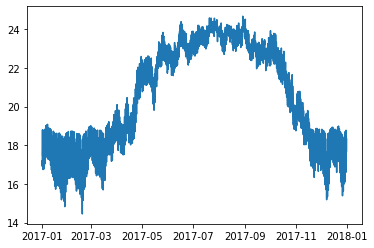

In [10]:
plt.figure()
plt.plot(T_in_df['mean_house'])

In [11]:
# winter
offset = 0
rolling_mean_df = pd.DataFrame(columns = ["Day", "Rolling mean"])
rolling_std_df = pd.DataFrame(columns = ["Day", "Rolling std"])
samples = 24*7
rows = T_winter_df.shape[0]
for i in range(rows):
    if i >= samples:
        mean = T_winter_df[offset:offset+samples]["mean_house"].mean()
        std = T_winter_df[offset:offset+samples]["mean_house"].std()
        rolling_mean_df.loc[len(rolling_mean_df.index)] = [T_winter_df.iloc[i,0], mean]
        rolling_std_df.loc[len(rolling_std_df.index)] = [T_winter_df.iloc[i,0], std]
        offset += 1
    else:
        rolling_mean_df.loc[len(rolling_mean_df.index)] = [T_winter_df.iloc[i,0], np.NaN]
        rolling_std_df.loc[len(rolling_std_df.index)] = [T_winter_df.iloc[i,0], np.NaN]

In [12]:
rolling_mean_df = rolling_mean_df.dropna(subset=['Rolling mean'], how='any')
#rolling_mean_df = rolling_mean_df.reset_index()
rolling_mean_df[:169]

,Day,Rolling mean
168,2017-01-08 00:00:00+00:00,18.037796
169,2017-01-08 01:00:00+00:00,18.041543
170,2017-01-08 02:00:00+00:00,18.043326
171,2017-01-08 03:00:00+00:00,18.045435
172,2017-01-08 04:00:00+00:00,18.047588
...,...,...
332,2017-01-14 20:00:00+00:00,17.837108
333,2017-01-14 21:00:00+00:00,17.836132
334,2017-01-14 22:00:00+00:00,17.834942
335,2017-01-14 23:00:00+00:00,17.833892


Text(0, 0.5, 'T_in')

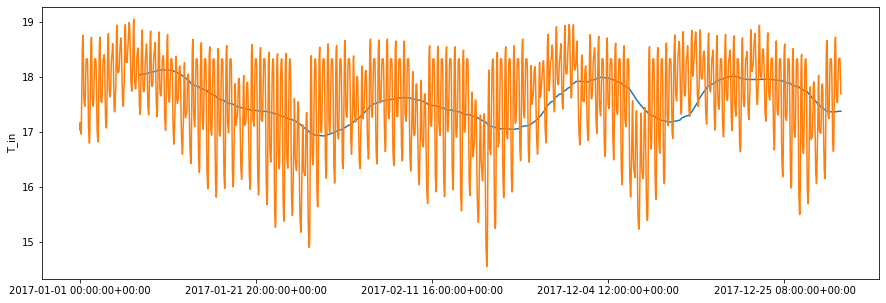

In [13]:
plt.figure(figsize=(15,5))
plt.plot(rolling_mean_df["Rolling mean"])
plt.plot(T_winter_df["mean_house"])
current_ticks_location = list(plt.xticks())
ticks_labels= list(T_winter_df["Time"][[0, 500, 1000, 1500, 2000]])
plt.xticks(ticks=[0, 500, 1000, 1500, 2000], labels=ticks_labels)
plt.ylabel("T_in")

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


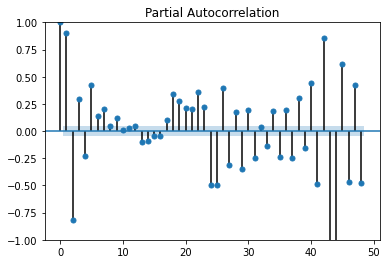

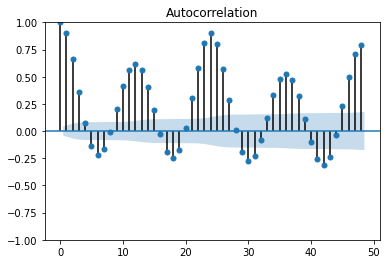

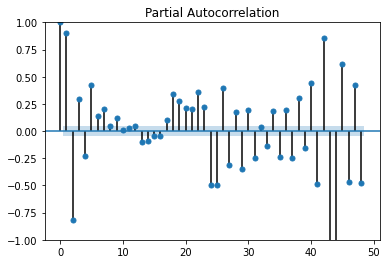

In [15]:
plot_acf(T_winter_df["mean_house"], lags=48) # 8
plot_pacf(T_winter_df["mean_house"], lags=48) # 10

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

In [17]:
T_winter_df = T_winter_df.dropna()

In [18]:
size_train = int(0.7*T_winter_df.shape[0])
X = T_winter_df["mean_house"].values.astype(float)
train, test = X[0:size_train], X[size_train::]
history = [x for x in train]
predictions = np.zeros(len(test))

p = 10
d = 1
q = 8


for t in range(0, len(test)):
    model = ARIMA(history, order=(p, d, q))
    model.initialize_approximate_diffuse()
    # method="hannan_rissanen"
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions[t] = yhat
    obs = test[t]
    history.append(obs)

print('(%i,%i,%i) model => MAE: %.3f -- MAPE: %.3f -- MSE: %.3f -- R2: %.3f'
          % (p, d, q,
             mean_absolute_error(test, predictions),
             mean_absolute_error(test, predictions) / test.mean() * 100,
             mean_squared_error(test, predictions),
             r2_score(test, predictions)))


/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packag

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: C

/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ict4bd/ict4bd/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(10,1,8) model => MAE: 0.119 -- MAPE: 0.673 -- MSE: 0.024 -- R2: 0.963
